In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [9]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-skku', group='skku', project='squirl')
backend = provider.get_backend('ibm_cairo')

ibmqfactory.load_account:WARNING:2021-10-15 01:56:21,559: Credentials are already in use. The existing account in the session will be replaced.


In [10]:
# get the basic feautures including qubit number of the backend.
config = backend.configuration()

print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

This backend is called ibm_cairo, and is on version 1.0.6. It has 27 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].


In [11]:
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import T1


In [13]:
backend = backend
# Time intervals to wait before measurement
delays = list(range(1, 40, 3))

exps=[]

for i in range(config.n_qubits):
    exp = T1(qubit=i,
            delays=delays,
            unit="us")
    exps.append(exp)
    
 
print(exps)

[<qiskit_experiments.library.characterization.t1.T1 object at 0x7f5c89f63d00>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f5c89f63e50>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f5c89f63f40>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f5c89f63610>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f5c89f8d0d0>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f5c89f8d1f0>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f5c89f8d310>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f5c89f8d400>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f5c89f8d4c0>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f5c89f8d5e0>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f5c89f8d6a0>, <qiskit_experiments.library.characterization.t1.T1 object at 0x7f5c89f8d790>, <qiskit_experiments.library.characterization.t1.T1 object at 0x

In [14]:
parallel_exp = ParallelExperiment(exps)
parallel_data = parallel_exp.run(backend).block_for_results()

/opt/conda/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [15]:
# View result data
for result in parallel_data.analysis_results():
    print(result)
    print("\nextra:")
    print(result.extra)

DbAnalysisResultV1
- name: parallel_experiment
- value: 27
- extra: <2 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']
- verified: False

extra:
{'experiment_types': ['T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1'], 'experiment_ids': ['78a78721-a115-41bb-81ed-bbc00399ad68', '51e1e783-8821-487c-a338-2e294272c2fc', '97a67808-dac2-4626-935d-570e7135923b', 'f1b6d996-c55d-4949-aba6-307b75d8ad0b', '8dfe8791-5170-4cf1-ad51-c5123bc91df3', '7fab738d-873a-4bba-b869-22060dcbe1a6', '48b1dfc0-08a9-4c3c-9558-c08786a7f782', '86aa8b90-d632-40b3-a659-175efd61d91f', '3f2014a6-6f05-471e-8dc8-c226eaecf78a', '10649163-e885-448e-a65e-5ddab31d7b49', '7424a576-d151-47d2-a612-1cc8f6494aa2', '1b891d5e-be2f-43c1-8c05-5f8d60d9bf38', '72fdea05-1

## Get T1 results for all the qubit in the backend!

Component experiment 0


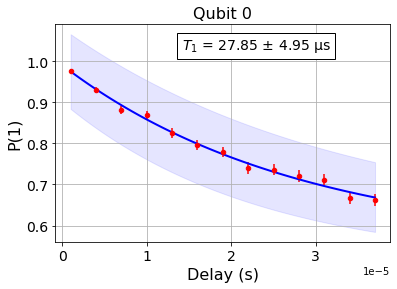

DbAnalysisResultV1
- name: T1
- value: 2.785187371456394e-05 ± 4.952324968027178e-06 s
- χ²: 0.6141566376784506
- quality: bad
- extra: <9 items>
- device_components: ['Q0']
- verified: False
Component experiment 1


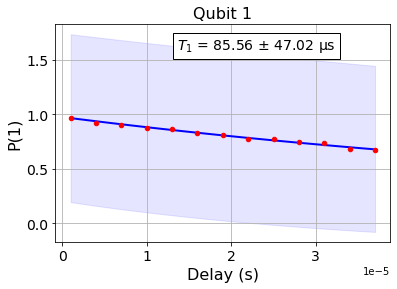

DbAnalysisResultV1
- name: T1
- value: 8.556452672670707e-05 ± 4.7017454886976774e-05 s
- χ²: 0.9908478842748563
- quality: bad
- extra: <9 items>
- device_components: ['Q1']
- verified: False
Component experiment 2


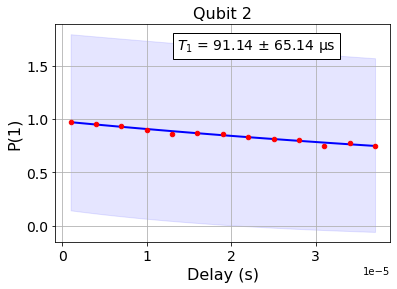

DbAnalysisResultV1
- name: T1
- value: 9.114415572013054e-05 ± 6.514359188376513e-05 s
- χ²: 1.235703147652528
- quality: bad
- extra: <9 items>
- device_components: ['Q2']
- verified: False
Component experiment 3


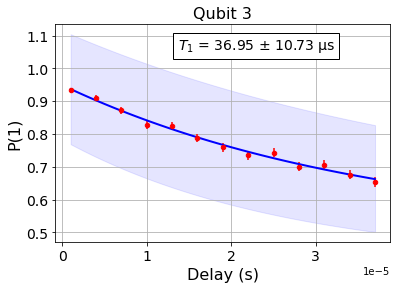

DbAnalysisResultV1
- name: T1
- value: 3.694634813138037e-05 ± 1.0733695443835173e-05 s
- χ²: 0.69246096432829
- quality: bad
- extra: <9 items>
- device_components: ['Q3']
- verified: False
Component experiment 4


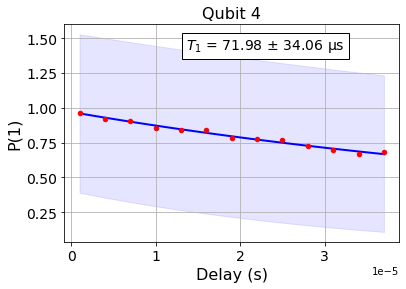

DbAnalysisResultV1
- name: T1
- value: 7.197646810151968e-05 ± 3.4056408517558323e-05 s
- χ²: 1.3331007306846145
- quality: bad
- extra: <9 items>
- device_components: ['Q4']
- verified: False
Component experiment 5


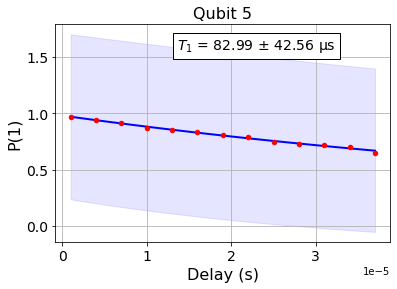

DbAnalysisResultV1
- name: T1
- value: 8.29870360836425e-05 ± 4.2564742491413365e-05 s
- χ²: 0.5836320897352681
- quality: bad
- extra: <9 items>
- device_components: ['Q5']
- verified: False
Component experiment 6


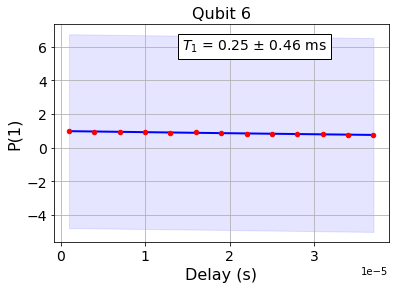

DbAnalysisResultV1
- name: T1
- value: 0.00025280153544563166 ± 0.0004562868229095095 s
- χ²: 1.5896024924331111
- quality: bad
- extra: <9 items>
- device_components: ['Q6']
- verified: False
Component experiment 7


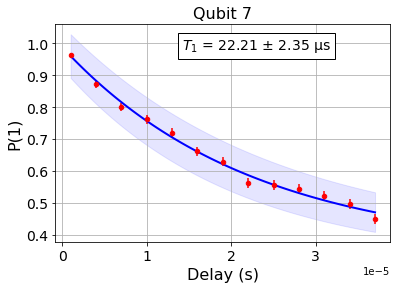

DbAnalysisResultV1
- name: T1
- value: 2.2213327792443348e-05 ± 2.347757566648442e-06 s
- χ²: 1.0552025109652394
- quality: bad
- extra: <9 items>
- device_components: ['Q7']
- verified: False
Component experiment 8


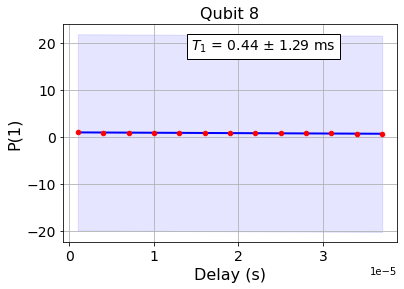

DbAnalysisResultV1
- name: T1
- value: 0.0004440476437119981 ± 0.0012879032210555664 s
- χ²: 2.118589000688302
- quality: bad
- extra: <9 items>
- device_components: ['Q8']
- verified: False
Component experiment 9


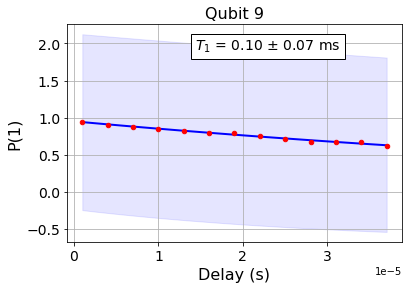

DbAnalysisResultV1
- name: T1
- value: 0.00010086228374116309 ± 6.716235256715191e-05 s
- χ²: 0.9757056847140639
- quality: bad
- extra: <9 items>
- device_components: ['Q9']
- verified: False
Component experiment 10


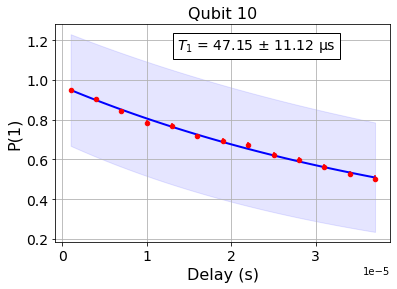

DbAnalysisResultV1
- name: T1
- value: 4.715083816010116e-05 ± 1.1123130283325396e-05 s
- χ²: 0.7085559960134563
- quality: bad
- extra: <9 items>
- device_components: ['Q10']
- verified: False
Component experiment 11


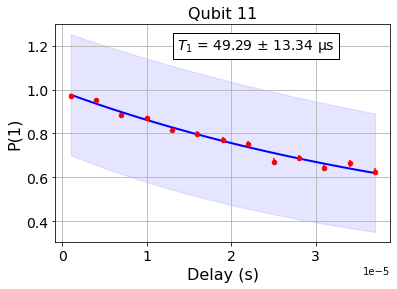

DbAnalysisResultV1
- name: T1
- value: 4.929093454292112e-05 ± 1.3339616569462836e-05 s
- χ²: 2.2781936416210824
- quality: bad
- extra: <9 items>
- device_components: ['Q11']
- verified: False
Component experiment 12


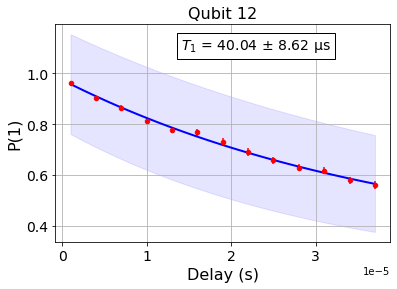

DbAnalysisResultV1
- name: T1
- value: 4.0044192839679e-05 ± 8.620512687000784e-06 s
- χ²: 0.5939861906811107
- quality: bad
- extra: <9 items>
- device_components: ['Q12']
- verified: False
Component experiment 13


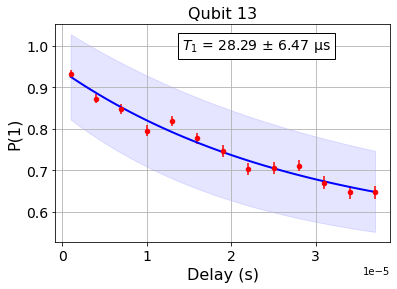

DbAnalysisResultV1
- name: T1
- value: 2.828662379073956e-05 ± 6.4722931784273886e-06 s
- χ²: 1.742429842957281
- quality: bad
- extra: <9 items>
- device_components: ['Q13']
- verified: False
Component experiment 14


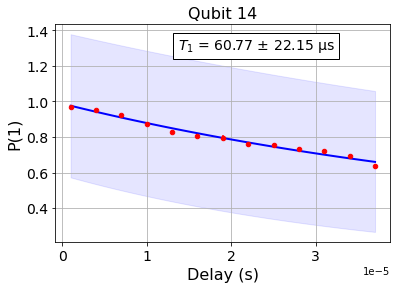

DbAnalysisResultV1
- name: T1
- value: 6.0771468216769946e-05 ± 2.2148118611133345e-05 s
- χ²: 1.5745692493588586
- quality: bad
- extra: <9 items>
- device_components: ['Q14']
- verified: False
Component experiment 15


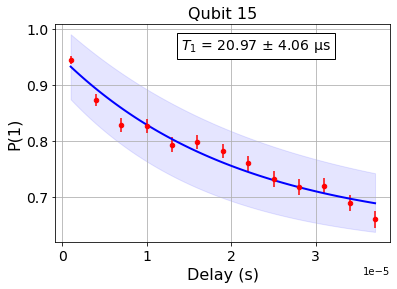

DbAnalysisResultV1
- name: T1
- value: 2.0972209103476425e-05 ± 4.062214323152265e-06 s
- χ²: 2.449497391624745
- quality: bad
- extra: <9 items>
- device_components: ['Q15']
- verified: False
Component experiment 16


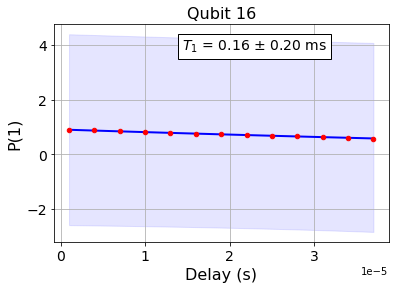

DbAnalysisResultV1
- name: T1
- value: 0.0001646868238379629 ± 0.00019705276231683883 s
- χ²: 0.6334243441763758
- quality: bad
- extra: <9 items>
- device_components: ['Q16']
- verified: False
Component experiment 17


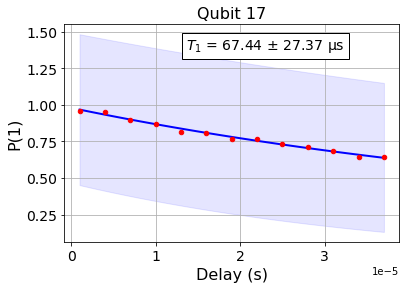

DbAnalysisResultV1
- name: T1
- value: 6.744181087829445e-05 ± 2.7370678344495295e-05 s
- χ²: 1.3702582190678543
- quality: bad
- extra: <9 items>
- device_components: ['Q17']
- verified: False
Component experiment 18


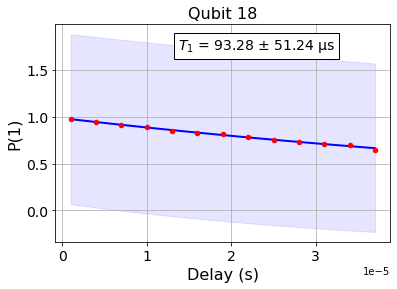

DbAnalysisResultV1
- name: T1
- value: 9.328426558790598e-05 ± 5.124205742793389e-05 s
- χ²: 0.3663162364818239
- quality: bad
- extra: <9 items>
- device_components: ['Q18']
- verified: False
Component experiment 19


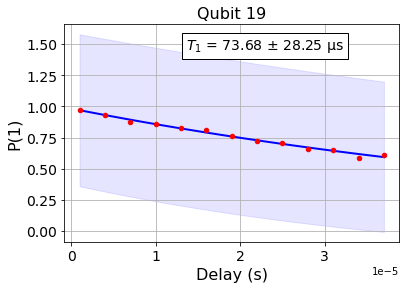

DbAnalysisResultV1
- name: T1
- value: 7.367644887648116e-05 ± 2.8251627252243575e-05 s
- χ²: 1.1723256162013456
- quality: bad
- extra: <9 items>
- device_components: ['Q19']
- verified: False
Component experiment 20


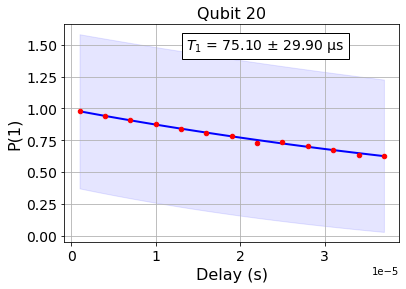

DbAnalysisResultV1
- name: T1
- value: 7.510451223941478e-05 ± 2.9896936238825212e-05 s
- χ²: 0.4588873173228459
- quality: bad
- extra: <9 items>
- device_components: ['Q20']
- verified: False
Component experiment 21


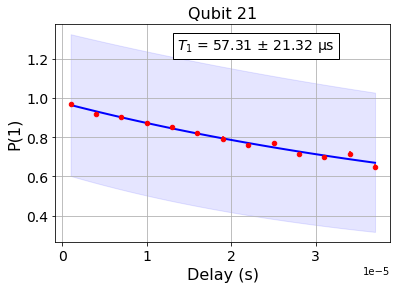

DbAnalysisResultV1
- name: T1
- value: 5.7305287275751426e-05 ± 2.131717486951649e-05 s
- χ²: 1.4147759674989702
- quality: bad
- extra: <9 items>
- device_components: ['Q21']
- verified: False
Component experiment 22


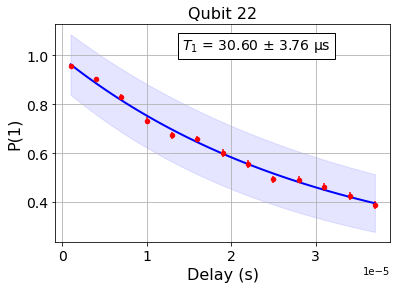

DbAnalysisResultV1
- name: T1
- value: 3.06049913874679e-05 ± 3.7611968378052555e-06 s
- χ²: 1.5616549020516723
- quality: bad
- extra: <9 items>
- device_components: ['Q22']
- verified: False
Component experiment 23


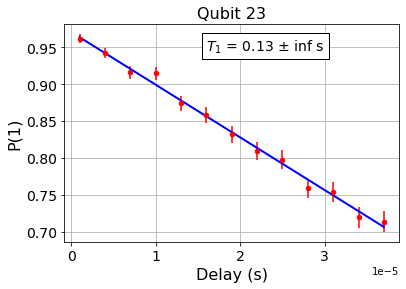

DbAnalysisResultV1
- name: T1
- value: 0.1282285975478122 ± inf s
- χ²: 0.5708265055810358
- quality: bad
- extra: <9 items>
- device_components: ['Q23']
- verified: False
Component experiment 24


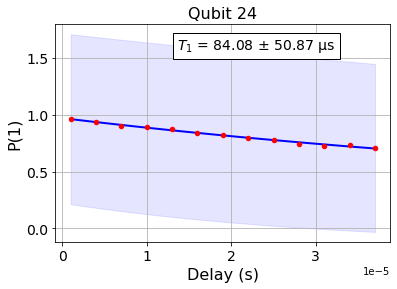

DbAnalysisResultV1
- name: T1
- value: 8.408083141836168e-05 ± 5.086765313280513e-05 s
- χ²: 0.7532873137756064
- quality: bad
- extra: <9 items>
- device_components: ['Q24']
- verified: False
Component experiment 25


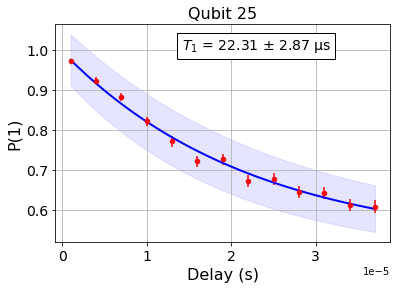

DbAnalysisResultV1
- name: T1
- value: 2.2305626599211988e-05 ± 2.867160900457293e-06 s
- χ²: 1.151172357057785
- quality: bad
- extra: <9 items>
- device_components: ['Q25']
- verified: False
Component experiment 26


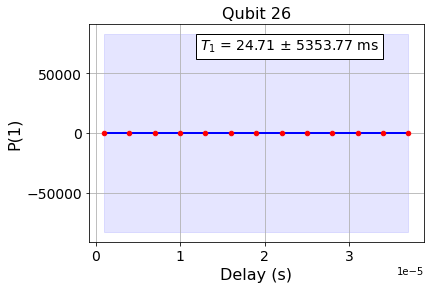

DbAnalysisResultV1
- name: T1
- value: 0.02470918953419369 ± 5.353766652083256 s
- χ²: 1.4740371582791352
- quality: bad
- extra: <9 items>
- device_components: ['Q26']
- verified: False


In [16]:
# Print sub-experiment data
for i in range(parallel_exp.num_experiments):
    print(f"Component experiment {i}")
    sub_data = parallel_data.component_experiment_data(i)
    display(sub_data.figure(0))
    for result in sub_data.analysis_results():
        print(result)

## T2 Characterization

In [18]:
from qiskit_experiments.library import T2Ramsey

In [19]:
T2_exps=[]
delays = list(range(1, 150, 5))

for i in range(config.n_qubits):
    exp = T2Ramsey(qubit=i,
            delays=delays,
            unit="us",
                  osc_freq=1e5)
    exp.set_analysis_options(plot=True)
    T2_exps.append(exp)
    
 
print(T2_exps)

[<qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f5d008b7970>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f5d008b79a0>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f5d008b7220>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f5d008b75b0>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f5d008b7730>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f5d008b7d00>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f5d008b7820>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f5d008b7fd0>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f5d008b7ee0>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f5d01d9f820>, <qiskit_experiments.library.characterization.t2ramsey.T2Ramsey object at 0x7f5d008d3640>, <qiskit_e

In [24]:
parallel_exp = ParallelExperiment(T2_exps)
parallel_data = parallel_exp.run(backend, shots=8192).block_for_results()

In [21]:
print(exp.circuits()[3])

     ┌───┐┌───────────────┐┌──────────────┐ ░ ┌───┐ ░ ┌─┐
q_0: ┤ H ├┤ Delay(16[us]) ├┤ Rz(3200000π) ├─░─┤ H ├─░─┤M├
     └───┘└───────────────┘└──────────────┘ ░ └───┘ ░ └╥┘
c: 1/══════════════════════════════════════════════════╩═
                                                       0 


In [22]:
# View result data
for result in parallel_data.analysis_results():
    print(result)
    print("\nextra:")
    print(result.extra)

DbAnalysisResultV1
- name: parallel_experiment
- value: 27
- extra: <2 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']
- verified: False

extra:
{'experiment_types': ['T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey', 'T2Ramsey'], 'experiment_ids': ['4659cd54-4201-4996-9dfa-56360ea90e6a', '200d0f0c-11ab-45ae-a993-7c78b3e50a9d', 'a5873dc8-e4dc-409b-9bdf-43226209206b', '589b845e-8808-4879-8c5e-5b57fce4513d', '1410d23e-f16e-4a36-a0a3-024ba265d4d8', '4cff76fd-ea4d-482e-8c53-d2d15c5413a7', '4c60d0d8-7def-40b5-bcaa-cbc66f9c2ef0', '570947f8-7d3f-4ca6-b3f7-8534ebc92c8b', 'e36df182

Component experiment 0


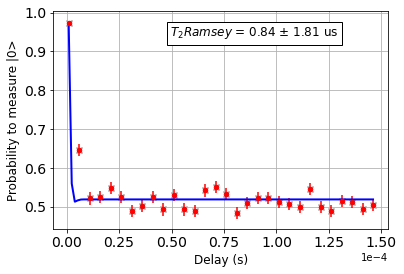

DbAnalysisResultV1
- name: T2star
- value: 8.365861001117629e-07 ± 1.8134633211545915e-06 s
- χ²: 4.783016799811509
- quality: bad
- extra: <10 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 107059.64440290259 ± 9.256460239770715e-06 Hz
- χ²: 4.783016799811509
- quality: bad
- extra: <10 items>
- device_components: ['Q0']
- verified: False
Component experiment 1


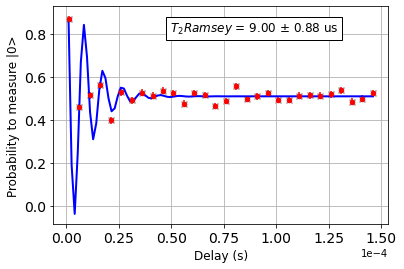

DbAnalysisResultV1
- name: T2star
- value: 8.997231160805323e-06 ± 8.835207763914659e-07 s
- χ²: 2.577382469232825
- quality: bad
- extra: <10 items>
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 110018.38084076536 ± 5446.347469796813 Hz
- χ²: 2.577382469232825
- quality: bad
- extra: <10 items>
- device_components: ['Q1']
- verified: False
Component experiment 2


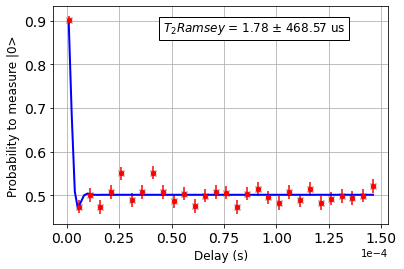

DbAnalysisResultV1
- name: T2star
- value: 1.7769400109529544e-06 ± 0.0004685653717176777 s
- χ²: 1.5880203443379224
- quality: bad
- extra: <10 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 110244.55714161629 ± 6064013.418130319 Hz
- χ²: 1.5880203443379224
- quality: bad
- extra: <10 items>
- device_components: ['Q2']
- verified: False
Component experiment 3


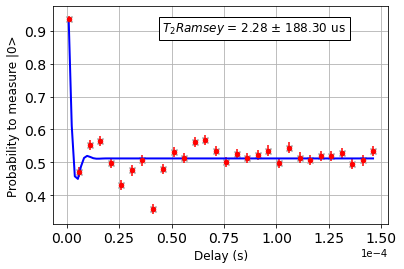

DbAnalysisResultV1
- name: T2star
- value: 2.2828300223849445e-06 ± 0.00018829838164484758 s
- χ²: 8.085158670748678
- quality: bad
- extra: <10 items>
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 99906.31489598597 ± 350.8391785733101 Hz
- χ²: 8.085158670748678
- quality: bad
- extra: <10 items>
- device_components: ['Q3']
- verified: False
Component experiment 4


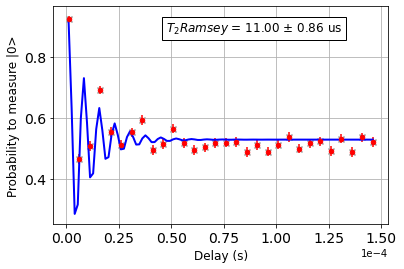

DbAnalysisResultV1
- name: T2star
- value: 1.100046290003572e-05 ± 8.587253806886339e-07 s
- χ²: 5.121053533067913
- quality: bad
- extra: <10 items>
- device_components: ['Q4']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 136216.75258207094 ± 1989.404045485233 Hz
- χ²: 5.121053533067913
- quality: bad
- extra: <10 items>
- device_components: ['Q4']
- verified: False
Component experiment 5


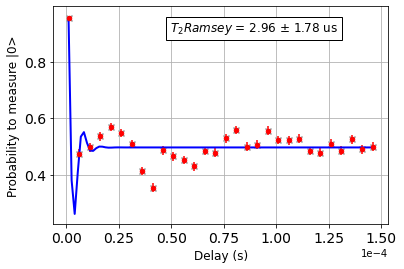

DbAnalysisResultV1
- name: T2star
- value: 2.9614594435143534e-06 ± 1.7835901175116615e-06 s
- χ²: 9.755613529453141
- quality: bad
- extra: <10 items>
- device_components: ['Q5']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 118944.07403159342 ± 178677.31418638906 Hz
- χ²: 9.755613529453141
- quality: bad
- extra: <10 items>
- device_components: ['Q5']
- verified: False
Component experiment 6


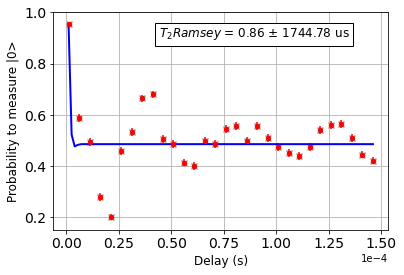

DbAnalysisResultV1
- name: T2star
- value: 8.642543212553844e-07 ± 0.0017447834503366436 s
- χ²: 53.2369978098833
- quality: bad
- extra: <10 items>
- device_components: ['Q6']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 112578.50994008033 ± 6.025203885561045 Hz
- χ²: 53.2369978098833
- quality: bad
- extra: <10 items>
- device_components: ['Q6']
- verified: False
Component experiment 7


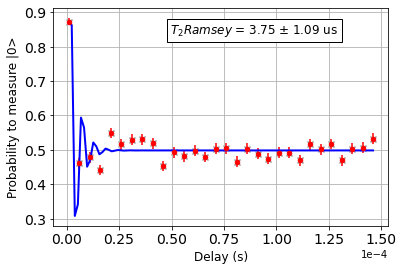

DbAnalysisResultV1
- name: T2star
- value: 3.7526881361098456e-06 ± 1.0946046296972886e-06 s
- χ²: 2.6190015137454283
- quality: bad
- extra: <10 items>
- device_components: ['Q7']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 174929.1998484347 ± 35235.42427202237 Hz
- χ²: 2.6190015137454283
- quality: bad
- extra: <10 items>
- device_components: ['Q7']
- verified: False
Component experiment 8


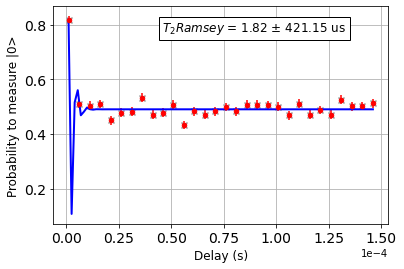

DbAnalysisResultV1
- name: T2star
- value: 1.8151543849418878e-06 ± 0.00042114711060662404 s
- χ²: 2.2560732717388605
- quality: bad
- extra: <10 items>
- device_components: ['Q8']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 200028.36675732644 ± 17516.472012481212 Hz
- χ²: 2.2560732717388605
- quality: bad
- extra: <10 items>
- device_components: ['Q8']
- verified: False
Component experiment 9


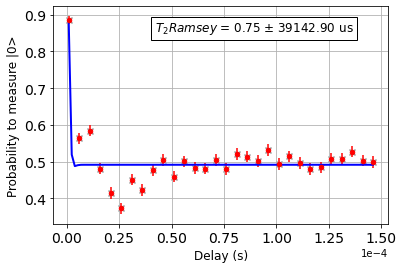

DbAnalysisResultV1
- name: T2star
- value: 7.486511981566402e-07 ± 0.03914290141177026 s
- χ²: 8.136913948579583
- quality: bad
- extra: <10 items>
- device_components: ['Q9']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 108707.93498838478 ± 1151.2808509971208 Hz
- χ²: 8.136913948579583
- quality: bad
- extra: <10 items>
- device_components: ['Q9']
- verified: False
Component experiment 10


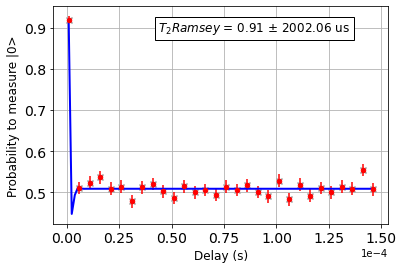

DbAnalysisResultV1
- name: T2star
- value: 9.113765169464431e-07 ± 0.0020020563516609897 s
- χ²: 1.1702770617174194
- quality: bad
- extra: <10 items>
- device_components: ['Q10']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 175926.98845558247 ± 13.882149502949932 Hz
- χ²: 1.1702770617174194
- quality: bad
- extra: <10 items>
- device_components: ['Q10']
- verified: False
Component experiment 11


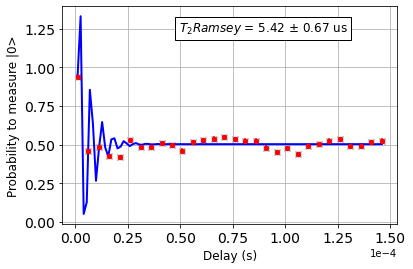

DbAnalysisResultV1
- name: T2star
- value: 5.419657279312682e-06 ± 6.749053665285526e-07 s
- χ²: 4.743999771900201
- quality: bad
- extra: <10 items>
- device_components: ['Q11']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 187735.93378065294 ± 13962.786617616619 Hz
- χ²: 4.743999771900201
- quality: bad
- extra: <10 items>
- device_components: ['Q11']
- verified: False
Component experiment 12


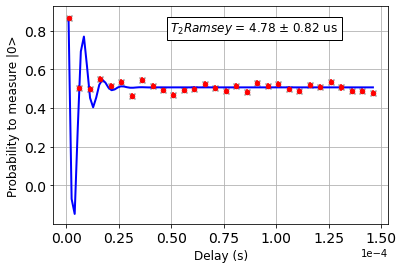

DbAnalysisResultV1
- name: T2star
- value: 4.777751555290928e-06 ± 8.195343090472937e-07 s
- χ²: 1.999351769357847
- quality: bad
- extra: <10 items>
- device_components: ['Q12']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 108262.42012068599 ± 47153.281475045704 Hz
- χ²: 1.999351769357847
- quality: bad
- extra: <10 items>
- device_components: ['Q12']
- verified: False
Component experiment 13


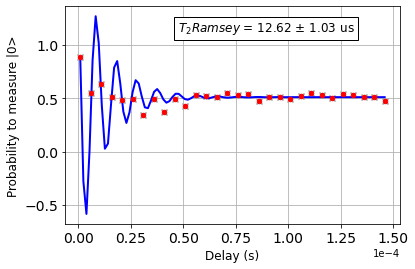

DbAnalysisResultV1
- name: T2star
- value: 1.2622386662506431e-05 ± 1.0330607979578751e-06 s
- χ²: 15.770226679760492
- quality: bad
- extra: <10 items>
- device_components: ['Q13']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 103571.30227336592 ± 5930.224437874797 Hz
- χ²: 15.770226679760492
- quality: bad
- extra: <10 items>
- device_components: ['Q13']
- verified: False
Component experiment 14


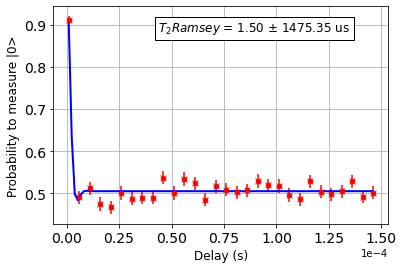

DbAnalysisResultV1
- name: T2star
- value: 1.4987307217115825e-06 ± 0.0014753537672125613 s
- χ²: 1.4339100840032788
- quality: bad
- extra: <10 items>
- device_components: ['Q14']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 111087.81573834569 ± 4984986.602630472 Hz
- χ²: 1.4339100840032788
- quality: bad
- extra: <10 items>
- device_components: ['Q14']
- verified: False
Component experiment 15


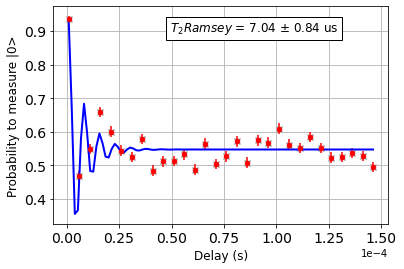

DbAnalysisResultV1
- name: T2star
- value: 7.036448352175514e-06 ± 8.433638623196485e-07 s
- χ²: 6.512209210719696
- quality: bad
- extra: <10 items>
- device_components: ['Q15']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 135292.82431496726 ± 5209.779872033764 Hz
- χ²: 6.512209210719696
- quality: bad
- extra: <10 items>
- device_components: ['Q15']
- verified: False
Component experiment 16


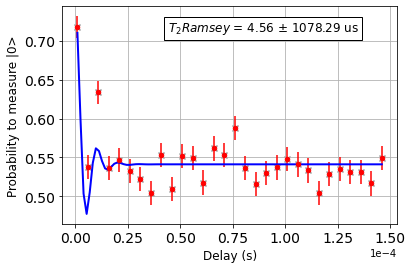

DbAnalysisResultV1
- name: T2star
- value: 4.5572017120568025e-06 ± 0.001078293545302241 s
- χ²: 3.0604170893785683
- quality: bad
- extra: <10 items>
- device_components: ['Q16']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 100003.03354859375 ± 58476225.21896924 Hz
- χ²: 3.0604170893785683
- quality: bad
- extra: <10 items>
- device_components: ['Q16']
- verified: False
Component experiment 17


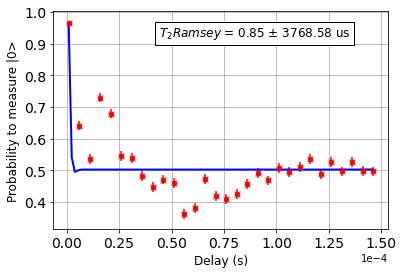

DbAnalysisResultV1
- name: T2star
- value: 8.512216626165417e-07 ± 0.0037685826824162944 s
- χ²: 32.613593890572005
- quality: bad
- extra: <10 items>
- device_components: ['Q17']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 110181.63409197683 ± 31.013164640495752 Hz
- χ²: 32.613593890572005
- quality: bad
- extra: <10 items>
- device_components: ['Q17']
- verified: False
Component experiment 18


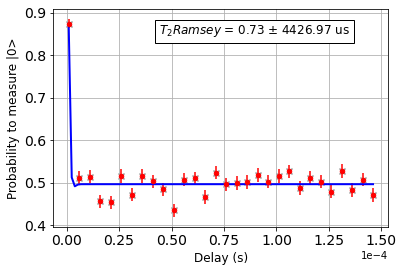

DbAnalysisResultV1
- name: T2star
- value: 7.316852987677149e-07 ± 0.004426965921276328 s
- χ²: 2.5894128531272576
- quality: bad
- extra: <10 items>
- device_components: ['Q18']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 119893.71304929815 ± 4.420025413785619 Hz
- χ²: 2.5894128531272576
- quality: bad
- extra: <10 items>
- device_components: ['Q18']
- verified: False
Component experiment 19


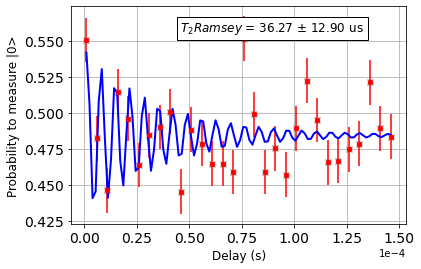

DbAnalysisResultV1
- name: T2star
- value: 3.6271102744466796e-05 ± 1.2903759797616018e-05 s
- χ²: 2.0768891630590174
- quality: bad
- extra: <10 items>
- device_components: ['Q19']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 146239.938649376 ± 1790.9069706137957 Hz
- χ²: 2.0768891630590174
- quality: bad
- extra: <10 items>
- device_components: ['Q19']
- verified: False
Component experiment 20


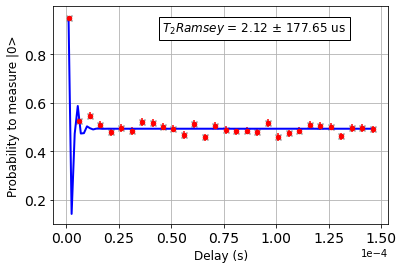

DbAnalysisResultV1
- name: T2star
- value: 2.1186318721897785e-06 ± 0.00017765047812338695 s
- χ²: 1.8024290241820702
- quality: bad
- extra: <10 items>
- device_components: ['Q20']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 199970.05500064892 ± 4715.15260949956 Hz
- χ²: 1.8024290241820702
- quality: bad
- extra: <10 items>
- device_components: ['Q20']
- verified: False
Component experiment 21


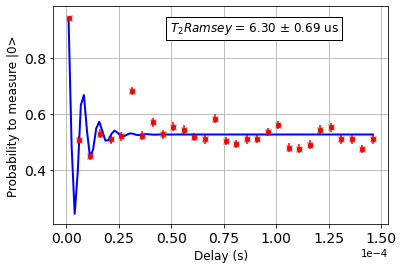

DbAnalysisResultV1
- name: T2star
- value: 6.299014726146622e-06 ± 6.86616359686992e-07 s
- χ²: 8.059576640997838
- quality: bad
- extra: <10 items>
- device_components: ['Q21']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 131737.88243740847 ± 6501.802424141141 Hz
- χ²: 8.059576640997838
- quality: bad
- extra: <10 items>
- device_components: ['Q21']
- verified: False
Component experiment 22


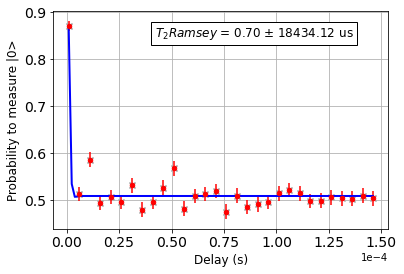

DbAnalysisResultV1
- name: T2star
- value: 7.026105015013978e-07 ± 0.01843411800234192 s
- χ²: 2.523530200502868
- quality: bad
- extra: <10 items>
- device_components: ['Q22']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 102980.3642246784 ± 371.5403323175309 Hz
- χ²: 2.523530200502868
- quality: bad
- extra: <10 items>
- device_components: ['Q22']
- verified: False
Component experiment 23


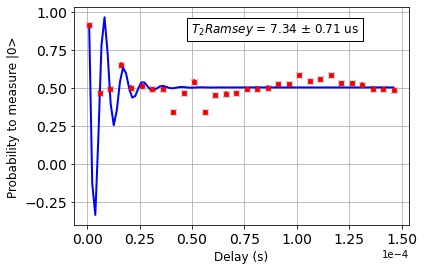

DbAnalysisResultV1
- name: T2star
- value: 7.3439222661630185e-06 ± 7.137524260741563e-07 s
- χ²: 16.655372610528318
- quality: bad
- extra: <10 items>
- device_components: ['Q23']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 108276.43005046586 ± 8822.40981607159 Hz
- χ²: 16.655372610528318
- quality: bad
- extra: <10 items>
- device_components: ['Q23']
- verified: False
Component experiment 24


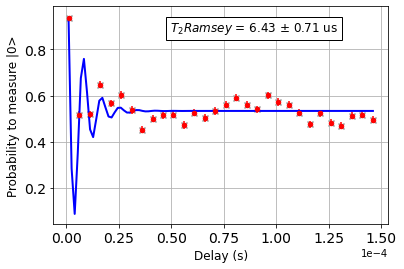

DbAnalysisResultV1
- name: T2star
- value: 6.433177667114864e-06 ± 7.106089663578844e-07 s
- χ²: 8.435479221817399
- quality: bad
- extra: <10 items>
- device_components: ['Q24']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 116181.69387924497 ± 8346.825335877058 Hz
- χ²: 8.435479221817399
- quality: bad
- extra: <10 items>
- device_components: ['Q24']
- verified: False
Component experiment 25


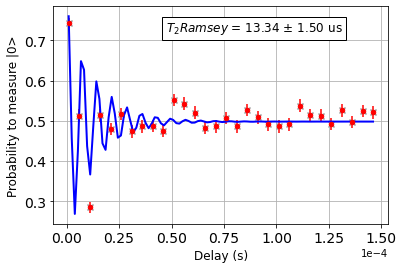

DbAnalysisResultV1
- name: T2star
- value: 1.333881650102978e-05 ± 1.4951086181475654e-06 s
- χ²: 4.664856618015003
- quality: bad
- extra: <10 items>
- device_components: ['Q25']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 142188.74741958687 ± 1764.5049177602618 Hz
- χ²: 4.664856618015003
- quality: bad
- extra: <10 items>
- device_components: ['Q25']
- verified: False
Component experiment 26


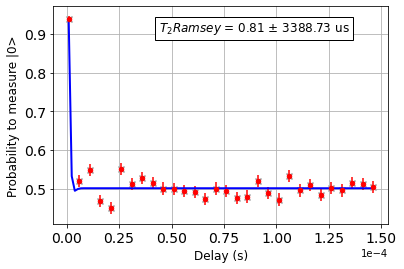

DbAnalysisResultV1
- name: T2star
- value: 8.11205640472761e-07 ± 0.0033887286339699405 s
- χ²: 2.4388606002989106
- quality: bad
- extra: <10 items>
- device_components: ['Q26']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 112892.19656189354 ± 12.582823513366364 Hz
- χ²: 2.4388606002989106
- quality: bad
- extra: <10 items>
- device_components: ['Q26']
- verified: False


In [23]:
# Print sub-experiment data
for i in range(parallel_exp.num_experiments):
    print(f"Component experiment {i}")
    sub_data = parallel_data.component_experiment_data(i)
    display(sub_data.figure(0))
    for result in sub_data.analysis_results():
        print(result)